# Data Cleaning part II

After gathering and combining the tweets, it was important to remove null values in order to create a VADER-based sentiment analysis for data exploration.

In [100]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [101]:
pd.read_csv('depressive_unigram_tweets_final.csv')

,Unnamed: 0,Unnamed: 0.1,id,time,tweet,hashtags,cashtags
0,0,0,1.15135E+18,21:25:13,"Wow, my dad yday: “you don’t take those stupid...",[],[]
1,1,1,1.15135E+18,21:25:07,what part of this was really harmfult of a lot...,[],[]
2,2,2,1.15135E+18,21:25:06,one of the ways I got through my #depression i...,"['#depression', '#uncoveringthenewu', '#change...",[]
3,3,3,1.15135E+18,21:24:55,see i wanna do one of them but they all say th...,[],[]
4,4,4,1.15135E+18,21:24:51,IS IT clinical depression or is it the palpabl...,[],[]
...,...,...,...,...,...,...,...
160354,160354,NaN,1.15092e+18,17:00:17,Depression is real,[],[]
160355,160355,NaN,1.15092e+18,17:00:13,Even though Tropical Depression Barry did not ...,[],[]
160356,160356,NaN,1.15092e+18,17:00:10,https://medtally.com/post/cluster-analysis-wi...,"['#depression', '#depressed', '#antidepressant...",[]
160357,160357,NaN,1.15092e+18,17:00:09,مش لاقى أى مبرر لل sudden depression attack ال...,[],[]


In [102]:

import nltk
nltk.download(['punkt','stopwords'])
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] <urlopen error [Errno 11001] getaddrinfo failed>


In [103]:
df2 = pd.read_csv('depressive_unigram_tweets_final.csv')

In [106]:
df2.head()

,Unnamed: 0,Unnamed: 0.1,id,time,tweet,hashtags,cashtags
0,0,0,1.15135E+18,21:25:13,"Wow, my dad yday: “you don’t take those stupid...",[],[]
1,1,1,1.15135E+18,21:25:07,what part of this was really harmfult of a lot...,[],[]
2,2,2,1.15135E+18,21:25:06,one of the ways I got through my #depression i...,"['#depression', '#uncoveringthenewu', '#change...",[]
3,3,3,1.15135E+18,21:24:55,see i wanna do one of them but they all say th...,[],[]
4,4,4,1.15135E+18,21:24:51,IS IT clinical depression or is it the palpabl...,[],[]


In [105]:
df2.isnull().any().any()  

True

In [107]:
df2.info(null_counts=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160359 entries, 0 to 160358
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Unnamed: 0    160359 non-null  int64 
 1   Unnamed: 0.1  135497 non-null  object
 2   id            160349 non-null  object
 3   time          160349 non-null  object
 4   tweet         160336 non-null  object
 5   hashtags      160323 non-null  object
 6   cashtags      160323 non-null  object
dtypes: int64(1), object(6)
memory usage: 8.6+ MB


In [108]:
df_new = df2[df2['tweet'].notnull()]

In [109]:
df_new.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160336 entries, 0 to 160358
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Unnamed: 0    160336 non-null  int64 
 1   Unnamed: 0.1  135474 non-null  object
 2   id            160336 non-null  object
 3   time          160336 non-null  object
 4   tweet         160336 non-null  object
 5   hashtags      160323 non-null  object
 6   cashtags      160323 non-null  object
dtypes: int64(1), object(6)
memory usage: 9.8+ MB


In [110]:
df_new.isnull().any().any() 

True

In [111]:
df_new['clean_tweet'] = df_new['tweet'].apply(lambda x: ' '.join([item for item in x.split() if item not in stopwords])) 

In [112]:
df_new.head()

,Unnamed: 0,Unnamed: 0.1,id,time,tweet,hashtags,cashtags,clean_tweet
0,0,0,1.15135E+18,21:25:13,"Wow, my dad yday: “you don’t take those stupid...",[],[],"Wow, dad yday: “you don’t take stupid depressi..."
1,1,1,1.15135E+18,21:25:07,what part of this was really harmfult of a lot...,[],[],part really harmfult lot people went every gui...
2,2,2,1.15135E+18,21:25:06,one of the ways I got through my #depression i...,"['#depression', '#uncoveringthenewu', '#change...",[],one ways I got #depression learning dance rain...
3,3,3,1.15135E+18,21:24:55,see i wanna do one of them but they all say th...,[],[],"see wanna one say PTSD, depression, and/or anx..."
4,4,4,1.15135E+18,21:24:51,IS IT clinical depression or is it the palpabl...,[],[],IS IT clinical depression palpable hopelessnes...


In [113]:
df_new['vader_score'] = df_new['clean_tweet'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [114]:
df_new.head()


,Unnamed: 0,Unnamed: 0.1,id,time,tweet,hashtags,cashtags,clean_tweet,vader_score
0,0,0,1.15135E+18,21:25:13,"Wow, my dad yday: “you don’t take those stupid...",[],[],"Wow, dad yday: “you don’t take stupid depressi...",-0.4122
1,1,1,1.15135E+18,21:25:07,what part of this was really harmfult of a lot...,[],[],part really harmfult lot people went every gui...,-0.8074
2,2,2,1.15135E+18,21:25:06,one of the ways I got through my #depression i...,"['#depression', '#uncoveringthenewu', '#change...",[],one ways I got #depression learning dance rain...,0.3382
3,3,3,1.15135E+18,21:24:55,see i wanna do one of them but they all say th...,[],[],"see wanna one say PTSD, depression, and/or anx...",-0.4588
4,4,4,1.15135E+18,21:24:51,IS IT clinical depression or is it the palpabl...,[],[],IS IT clinical depression palpable hopelessnes...,-0.8316


In [118]:
positive_num = len(df_new[df_new['vader_score'] >=0.05])
#neutral_num = len(df_new[(df_new['vaderReviewScore'] >-0.05) & (df_new['vaderReviewScore']<0.05)])
negative_num = len(df_new[df_new['vader_score']<0.05])

In [116]:
#positive_num,neutral_num, negative_num
positive_num, negative_num

(34221, 126115)

In [117]:
df_new['vader_sentiment_label']= df_new['vader_score'].map(lambda x:int(1) if x>=0.05 else int(0))

In [119]:
df_new.head()

,Unnamed: 0,Unnamed: 0.1,id,time,tweet,hashtags,cashtags,clean_tweet,vader_score,vader_sentiment_label
0,0,0,1.15135E+18,21:25:13,"Wow, my dad yday: “you don’t take those stupid...",[],[],"Wow, dad yday: “you don’t take stupid depressi...",-0.4122,0
1,1,1,1.15135E+18,21:25:07,what part of this was really harmfult of a lot...,[],[],part really harmfult lot people went every gui...,-0.8074,0
2,2,2,1.15135E+18,21:25:06,one of the ways I got through my #depression i...,"['#depression', '#uncoveringthenewu', '#change...",[],one ways I got #depression learning dance rain...,0.3382,1
3,3,3,1.15135E+18,21:24:55,see i wanna do one of them but they all say th...,[],[],"see wanna one say PTSD, depression, and/or anx...",-0.4588,0
4,4,4,1.15135E+18,21:24:51,IS IT clinical depression or is it the palpabl...,[],[],IS IT clinical depression palpable hopelessnes...,-0.8316,0


In [23]:
#df_new.loc[df_new['vaderReviewScore'] >=0.00,"vaderSentimentLabel"] = 1
#df_new.loc[df_new['vaderReviewScore']<=-0.00,"vaderSentimentLabel"] = 0

In [120]:
df_new.head()

,Unnamed: 0,Unnamed: 0.1,id,time,tweet,hashtags,cashtags,clean_tweet,vader_score,vader_sentiment_label
0,0,0,1.15135E+18,21:25:13,"Wow, my dad yday: “you don’t take those stupid...",[],[],"Wow, dad yday: “you don’t take stupid depressi...",-0.4122,0
1,1,1,1.15135E+18,21:25:07,what part of this was really harmfult of a lot...,[],[],part really harmfult lot people went every gui...,-0.8074,0
2,2,2,1.15135E+18,21:25:06,one of the ways I got through my #depression i...,"['#depression', '#uncoveringthenewu', '#change...",[],one ways I got #depression learning dance rain...,0.3382,1
3,3,3,1.15135E+18,21:24:55,see i wanna do one of them but they all say th...,[],[],"see wanna one say PTSD, depression, and/or anx...",-0.4588,0
4,4,4,1.15135E+18,21:24:51,IS IT clinical depression or is it the palpabl...,[],[],IS IT clinical depression palpable hopelessnes...,-0.8316,0


In [121]:
df_new.drop(['Unnamed: 0.1', 'id', 'time', 'tweet', ], axis = 1, inplace = True)

ERROR: Could not find a version that satisfies the requirement df_new (from versions: none)
ERROR: No matching distribution found for df_new


In [122]:
df_new = df_new[['Unnamed: 0', 'vader_sentiment_label', 'vader_score', 'clean_tweet']]

In [123]:
df_new.head()

,Unnamed: 0,vader_sentiment_label,vader_score,clean_tweet
0,0,0,-0.4122,"Wow, dad yday: “you don’t take stupid depressi..."
1,1,0,-0.8074,part really harmfult lot people went every gui...
2,2,1,0.3382,one ways I got #depression learning dance rain...
3,3,0,-0.4588,"see wanna one say PTSD, depression, and/or anx..."
4,4,0,-0.8316,IS IT clinical depression palpable hopelessnes...


In [124]:
positive_num = len(df_new[df_new['vader_score'] >=0.05])
neutral_num = len(df_new[(df_new['vader_score'] >-0.05) & (df_new['vader_score']<0.05)])
negative_num = len(df_new[df_new['vader_score']<=-0.05])

In [125]:
positive_num,neutral_num, negative_num

(34221, 33979, 92136)

In [126]:
df_new.to_csv('vader_processed_final.csv')

In [127]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import nltk
from nltk.corpus import stopwords
import re
from nltk import bigrams
import networkx as nx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")


  Attempting uninstall: decorator
    Found existing installation: decorator 5.0.9
    Uninstalling decorator-5.0.9:
      Successfully uninstalled decorator-5.0.9


In [128]:
df_new['text'] = df_new['clean_tweet']

In [129]:
df_new['text']

0         Wow, dad yday: “you don’t take stupid depressi...
1         part really harmfult lot people went every gui...
2         one ways I got #depression learning dance rain...
3         see wanna one say PTSD, depression, and/or anx...
4         IS IT clinical depression palpable hopelessnes...
                                ...                        
160354                                      Depression real
160355    Even though Tropical Depression Barry unleash ...
160356    https://medtally.com/post/cluster-analysis-wit...
160357    مش لاقى أى مبرر لل sudden depression attack ال...
160358    New clinical trial #depression: Task Shifting ...
Name: text, Length: 160336, dtype: object

In [130]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [131]:
all_tweets_no_urls = [remove_url(tweet) for tweet in df_new['text']]
all_tweets_no_urls[:5]

['Wow dad yday you dont take stupid depression drugs anymore though you Because theyre absolute worst thing and never need them Aint great family supportive My moms sisters stance similar btw',
 'part really harmfult lot people went every guideline understand 13rw horror show supposed insight depression mental illness overall helpful public narrative topic',
 'one ways I got depression learning dance rain It source strength stronger circumstances UncoveringthenewU ChangeYourMindChangeYourCircumstances pictwittercom3vxKuQ0DvD',
 'see wanna one say PTSD depression andor anxiety play LIKEE',
 'IS IT clinical depression palpable hopelessness generation']

In [132]:
#lower_case = [word.lower() for word in df_new['text']]
sentences = df_new['text']

In [133]:
all_tweets_no_urls[0].split()

['Wow',
 'dad',
 'yday',
 'you',
 'dont',
 'take',
 'stupid',
 'depression',
 'drugs',
 'anymore',
 'though',
 'you',
 'Because',
 'theyre',
 'absolute',
 'worst',
 'thing',
 'and',
 'never',
 'need',
 'them',
 'Aint',
 'great',
 'family',
 'supportive',
 'My',
 'moms',
 'sisters',
 'stance',
 'similar',
 'btw']

In [134]:
all_tweets_no_urls[0].lower().split()

['wow',
 'dad',
 'yday',
 'you',
 'dont',
 'take',
 'stupid',
 'depression',
 'drugs',
 'anymore',
 'though',
 'you',
 'because',
 'theyre',
 'absolute',
 'worst',
 'thing',
 'and',
 'never',
 'need',
 'them',
 'aint',
 'great',
 'family',
 'supportive',
 'my',
 'moms',
 'sisters',
 'stance',
 'similar',
 'btw']

In [135]:
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweet[:2]

[['wow',
  'dad',
  'yday',
  'you',
  'dont',
  'take',
  'stupid',
  'depression',
  'drugs',
  'anymore',
  'though',
  'you',
  'because',
  'theyre',
  'absolute',
  'worst',
  'thing',
  'and',
  'never',
  'need',
  'them',
  'aint',
  'great',
  'family',
  'supportive',
  'my',
  'moms',
  'sisters',
  'stance',
  'similar',
  'btw'],
 ['part',
  'really',
  'harmfult',
  'lot',
  'people',
  'went',
  'every',
  'guideline',
  'understand',
  '13rw',
  'horror',
  'show',
  'supposed',
  'insight',
  'depression',
  'mental',
  'illness',
  'overall',
  'helpful',
  'public',
  'narrative',
  'topic']]

In [136]:
# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(15)

[('i', 54608),
 ('depression', 49082),
 ('lonely', 27847),
 ('im', 21362),
 ('suicide', 21196),
 ('depressed', 14155),
 ('like', 12483),
 ('people', 9691),
 ('the', 8016),
 ('you', 7913),
 ('its', 7898),
 ('feel', 7657),
 ('get', 7521),
 ('it', 7364),
 ('one', 6805)]

In [137]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

clean_tweets_no_urls.head()

,words,count
0,i,54608
1,depression,49082
2,lonely,27847
3,im,21362
4,suicide,21196


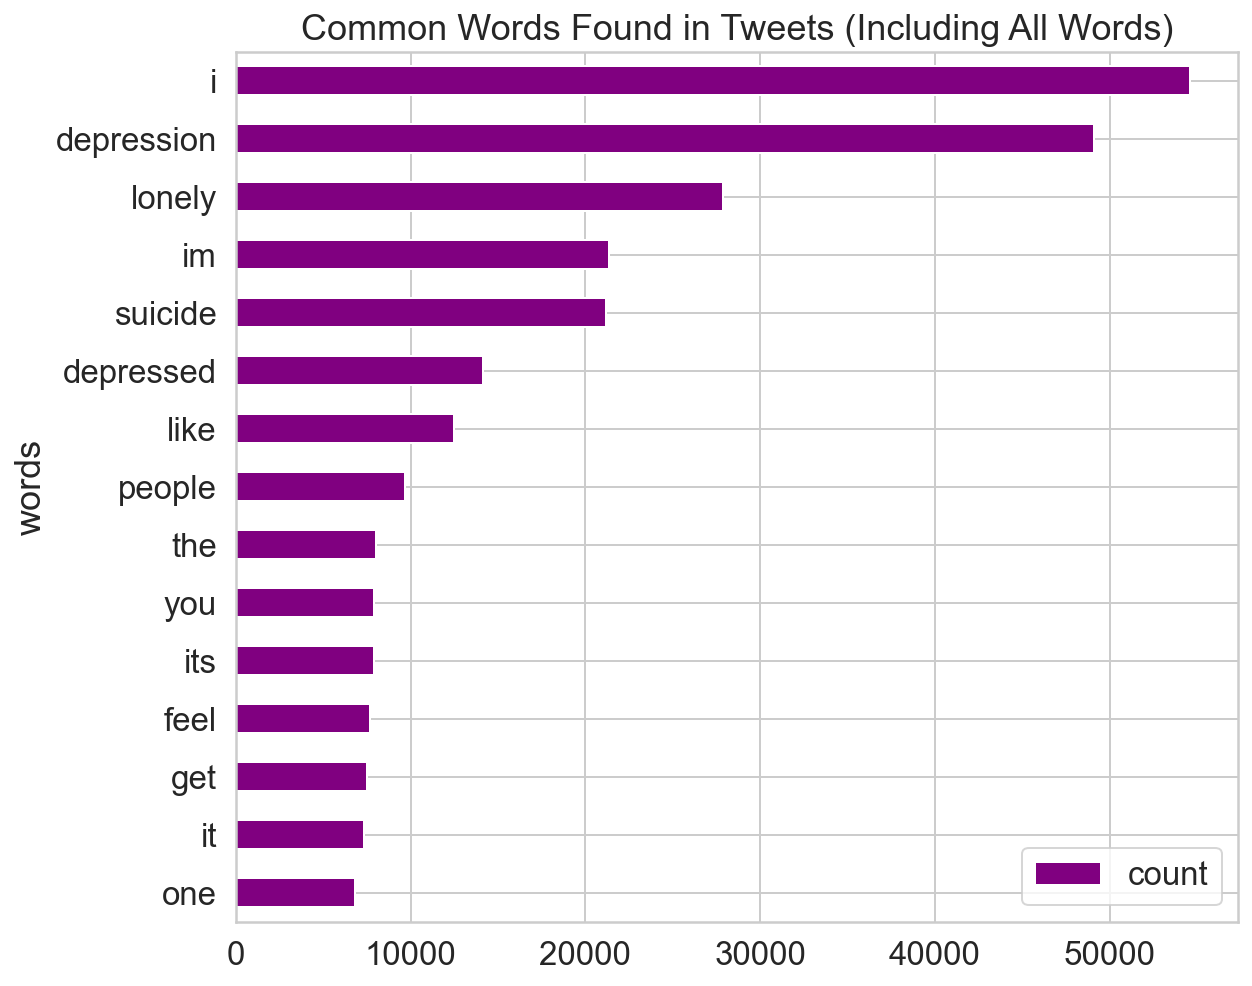

In [138]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()


In [139]:
stop_words = set(stopwords.words('english'))

# View a few words from the set
list(stop_words)[0:10]

['the',
 'was',
 'same',
 'but',
 'very',
 'aren',
 'while',
 "wasn't",
 'hadn',
 "didn't"]

In [140]:
words_in_tweet[0]


['wow',
 'dad',
 'yday',
 'you',
 'dont',
 'take',
 'stupid',
 'depression',
 'drugs',
 'anymore',
 'though',
 'you',
 'because',
 'theyre',
 'absolute',
 'worst',
 'thing',
 'and',
 'never',
 'need',
 'them',
 'aint',
 'great',
 'family',
 'supportive',
 'my',
 'moms',
 'sisters',
 'stance',
 'similar',
 'btw']

In [141]:
# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

tweets_nsw[0]

['wow',
 'dad',
 'yday',
 'dont',
 'take',
 'stupid',
 'depression',
 'drugs',
 'anymore',
 'though',
 'theyre',
 'absolute',
 'worst',
 'thing',
 'never',
 'need',
 'aint',
 'great',
 'family',
 'supportive',
 'moms',
 'sisters',
 'stance',
 'similar',
 'btw']

In [142]:
all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)

[('depression', 49082),
 ('lonely', 27847),
 ('im', 21362),
 ('suicide', 21196),
 ('depressed', 14155),
 ('like', 12483),
 ('people', 9691),
 ('feel', 7657),
 ('get', 7521),
 ('one', 6805),
 ('anxiety', 6555),
 ('know', 6524),
 ('dont', 6267),
 ('time', 6139),
 ('life', 5688)]

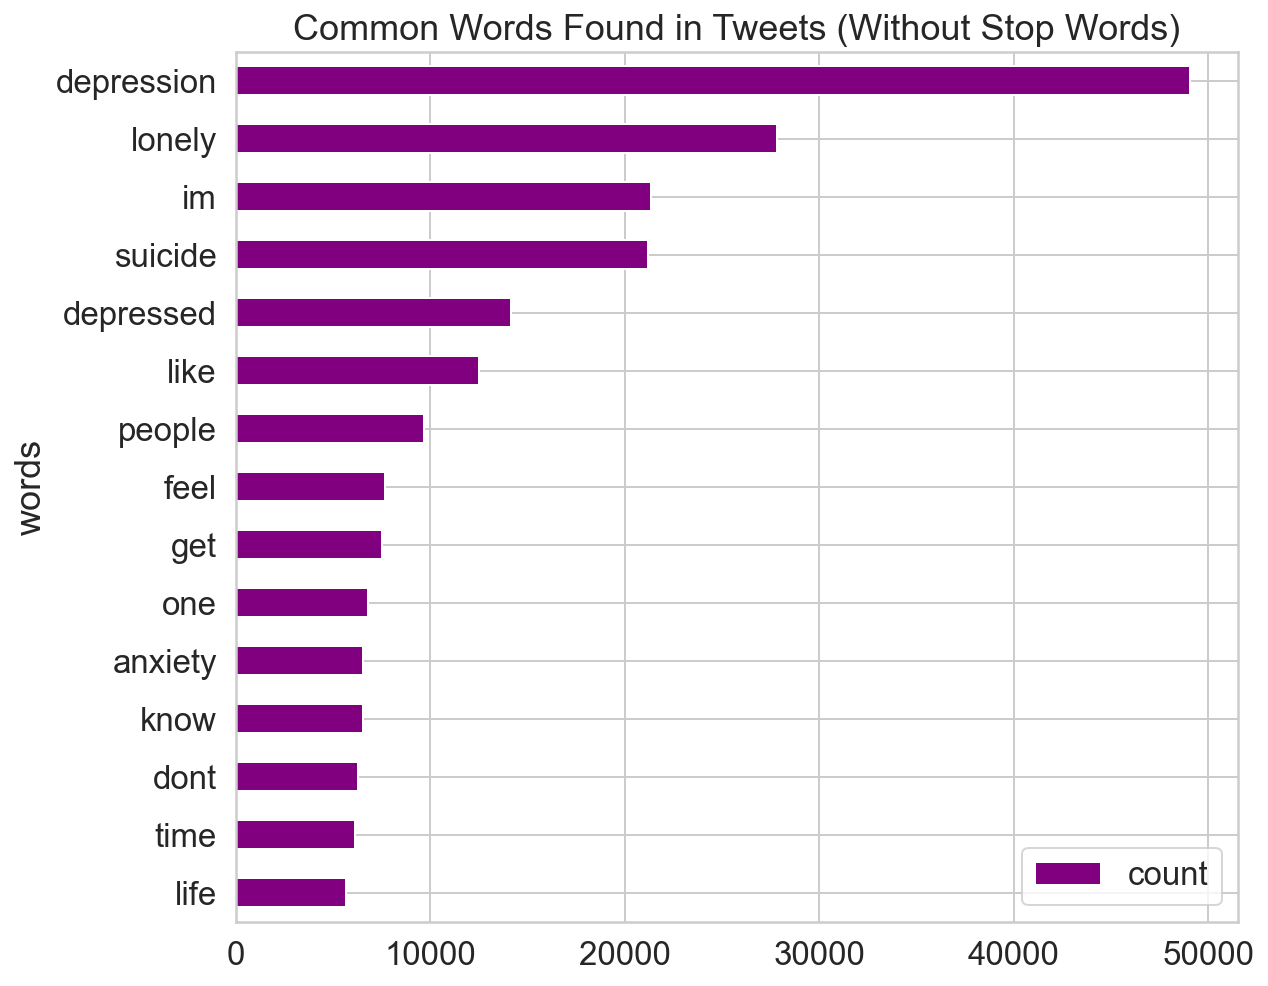

In [143]:
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()

In [144]:
collection_words = ['im', 'de', 'like', 'one']
tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]

In [145]:
tweets_nsw[0]


['wow',
 'dad',
 'yday',
 'dont',
 'take',
 'stupid',
 'depression',
 'drugs',
 'anymore',
 'though',
 'theyre',
 'absolute',
 'worst',
 'thing',
 'never',
 'need',
 'aint',
 'great',
 'family',
 'supportive',
 'moms',
 'sisters',
 'stance',
 'similar',
 'btw']

In [146]:
tweets_nsw_nc[0]


['wow',
 'dad',
 'yday',
 'dont',
 'take',
 'stupid',
 'depression',
 'drugs',
 'anymore',
 'though',
 'theyre',
 'absolute',
 'worst',
 'thing',
 'never',
 'need',
 'aint',
 'great',
 'family',
 'supportive',
 'moms',
 'sisters',
 'stance',
 'similar',
 'btw']

In [147]:
# Flatten list of words in clean tweets
all_words_nsw_nc = list(itertools.chain(*tweets_nsw_nc))

# Create counter of words in clean tweets
counts_nsw_nc = collections.Counter(all_words_nsw_nc)

counts_nsw_nc.most_common(15)

[('depression', 49082),
 ('lonely', 27847),
 ('suicide', 21196),
 ('depressed', 14155),
 ('people', 9691),
 ('feel', 7657),
 ('get', 7521),
 ('anxiety', 6555),
 ('know', 6524),
 ('dont', 6267),
 ('time', 6139),
 ('life', 5688),
 ('hopeless', 5650),
 ('really', 5229),
 ('love', 4733)]

In [148]:
len(counts_nsw_nc)


125555

In [149]:
mean(counts_nsw_nc)

NameError: name 'mean' is not defined

In [150]:
clean_tweets_ncw = pd.DataFrame(counts_nsw_nc.most_common(15),
                             columns=['words', 'count'])
clean_tweets_ncw.head()


,words,count
0,depression,49082
1,lonely,27847
2,suicide,21196
3,depressed,14155
4,people,9691


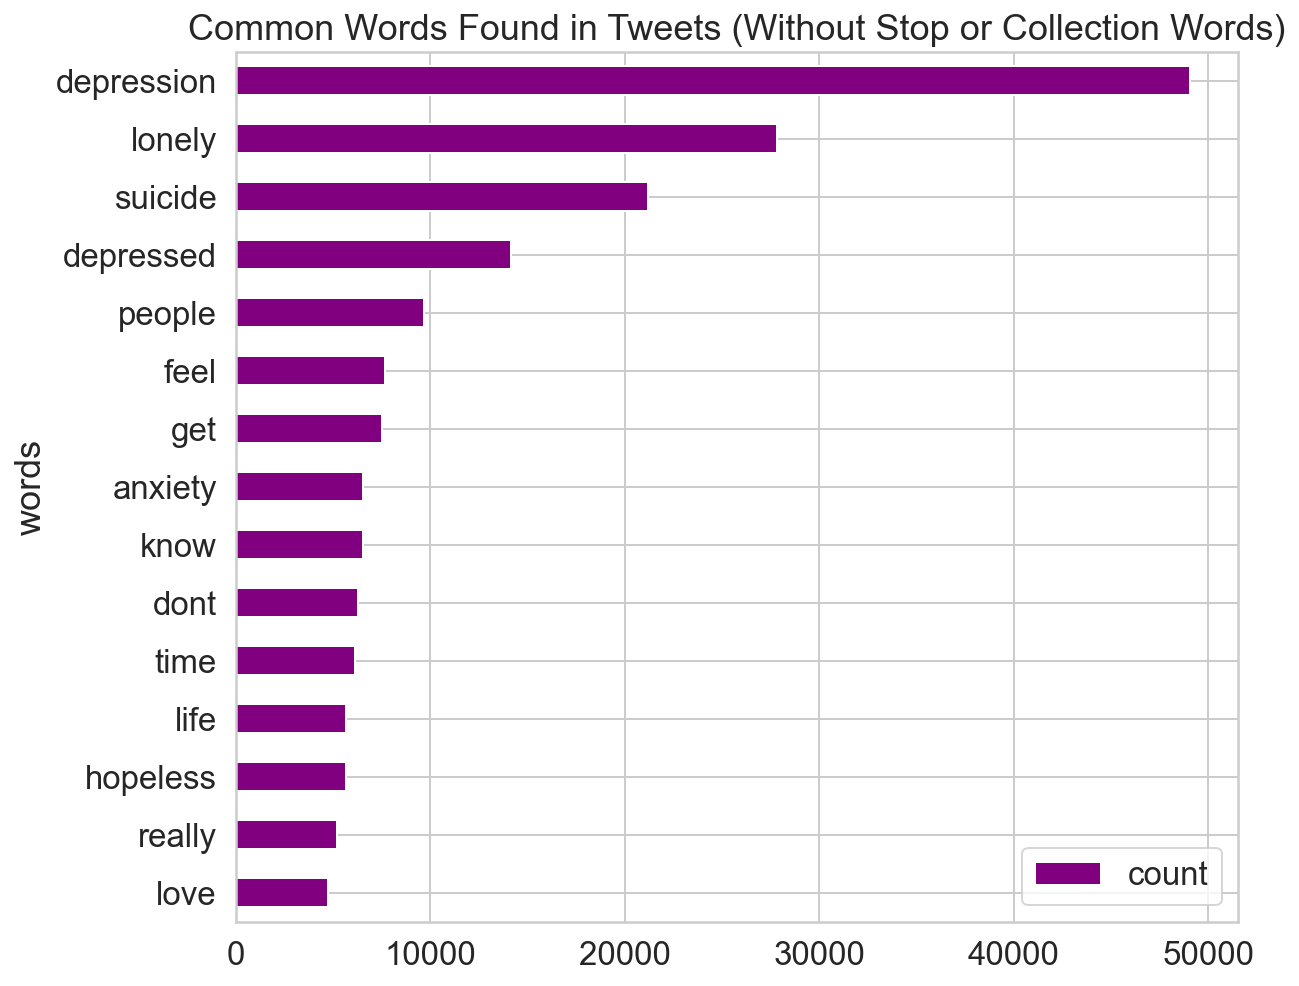

In [151]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_ncw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop or Collection Words)")

plt.show()

In [152]:
from nltk import bigrams

# Create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(tweet)) for tweet in tweets_nsw_nc]

# View bigrams for the first tweet
terms_bigram[0]

[('wow', 'dad'),
 ('dad', 'yday'),
 ('yday', 'dont'),
 ('dont', 'take'),
 ('take', 'stupid'),
 ('stupid', 'depression'),
 ('depression', 'drugs'),
 ('drugs', 'anymore'),
 ('anymore', 'though'),
 ('though', 'theyre'),
 ('theyre', 'absolute'),
 ('absolute', 'worst'),
 ('worst', 'thing'),
 ('thing', 'never'),
 ('never', 'need'),
 ('need', 'aint'),
 ('aint', 'great'),
 ('great', 'family'),
 ('family', 'supportive'),
 ('supportive', 'moms'),
 ('moms', 'sisters'),
 ('sisters', 'stance'),
 ('stance', 'similar'),
 ('similar', 'btw')]

In [153]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

[(('anxiety', 'depression'), 2550),
 (('depression', 'anxiety'), 2406),
 (('afraid', 'loneliness'), 2321),
 (('feel', 'lonely'), 1781),
 (('seasonal', 'depression'), 1595),
 (('mental', 'health'), 1519),
 (('suicide', 'squad'), 1385),
 (('commit', 'suicide'), 1372),
 (('social', 'media'), 1365),
 (('great', 'depression'), 1036),
 (('committed', 'suicide'), 873),
 (('tropical', 'depression'), 861),
 (('cure', 'seasonal'), 847),
 (('feeling', 'lonely'), 831),
 (('cure', 'depression'), 779),
 (('part', 'eyeball'), 719),
 (('hopeless', 'romantic'), 674),
 (('suicide', 'bomber'), 660),
 (('removed', 'part'), 651),
 (('eyeball', 'cure'), 643)]

In [154]:
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df

,bigram,count
0,"(anxiety, depression)",2550
1,"(depression, anxiety)",2406
2,"(afraid, loneliness)",2321
3,"(feel, lonely)",1781
4,"(seasonal, depression)",1595
5,"(mental, health)",1519
6,"(suicide, squad)",1385
7,"(commit, suicide)",1372
8,"(social, media)",1365
9,"(great, depression)",1036


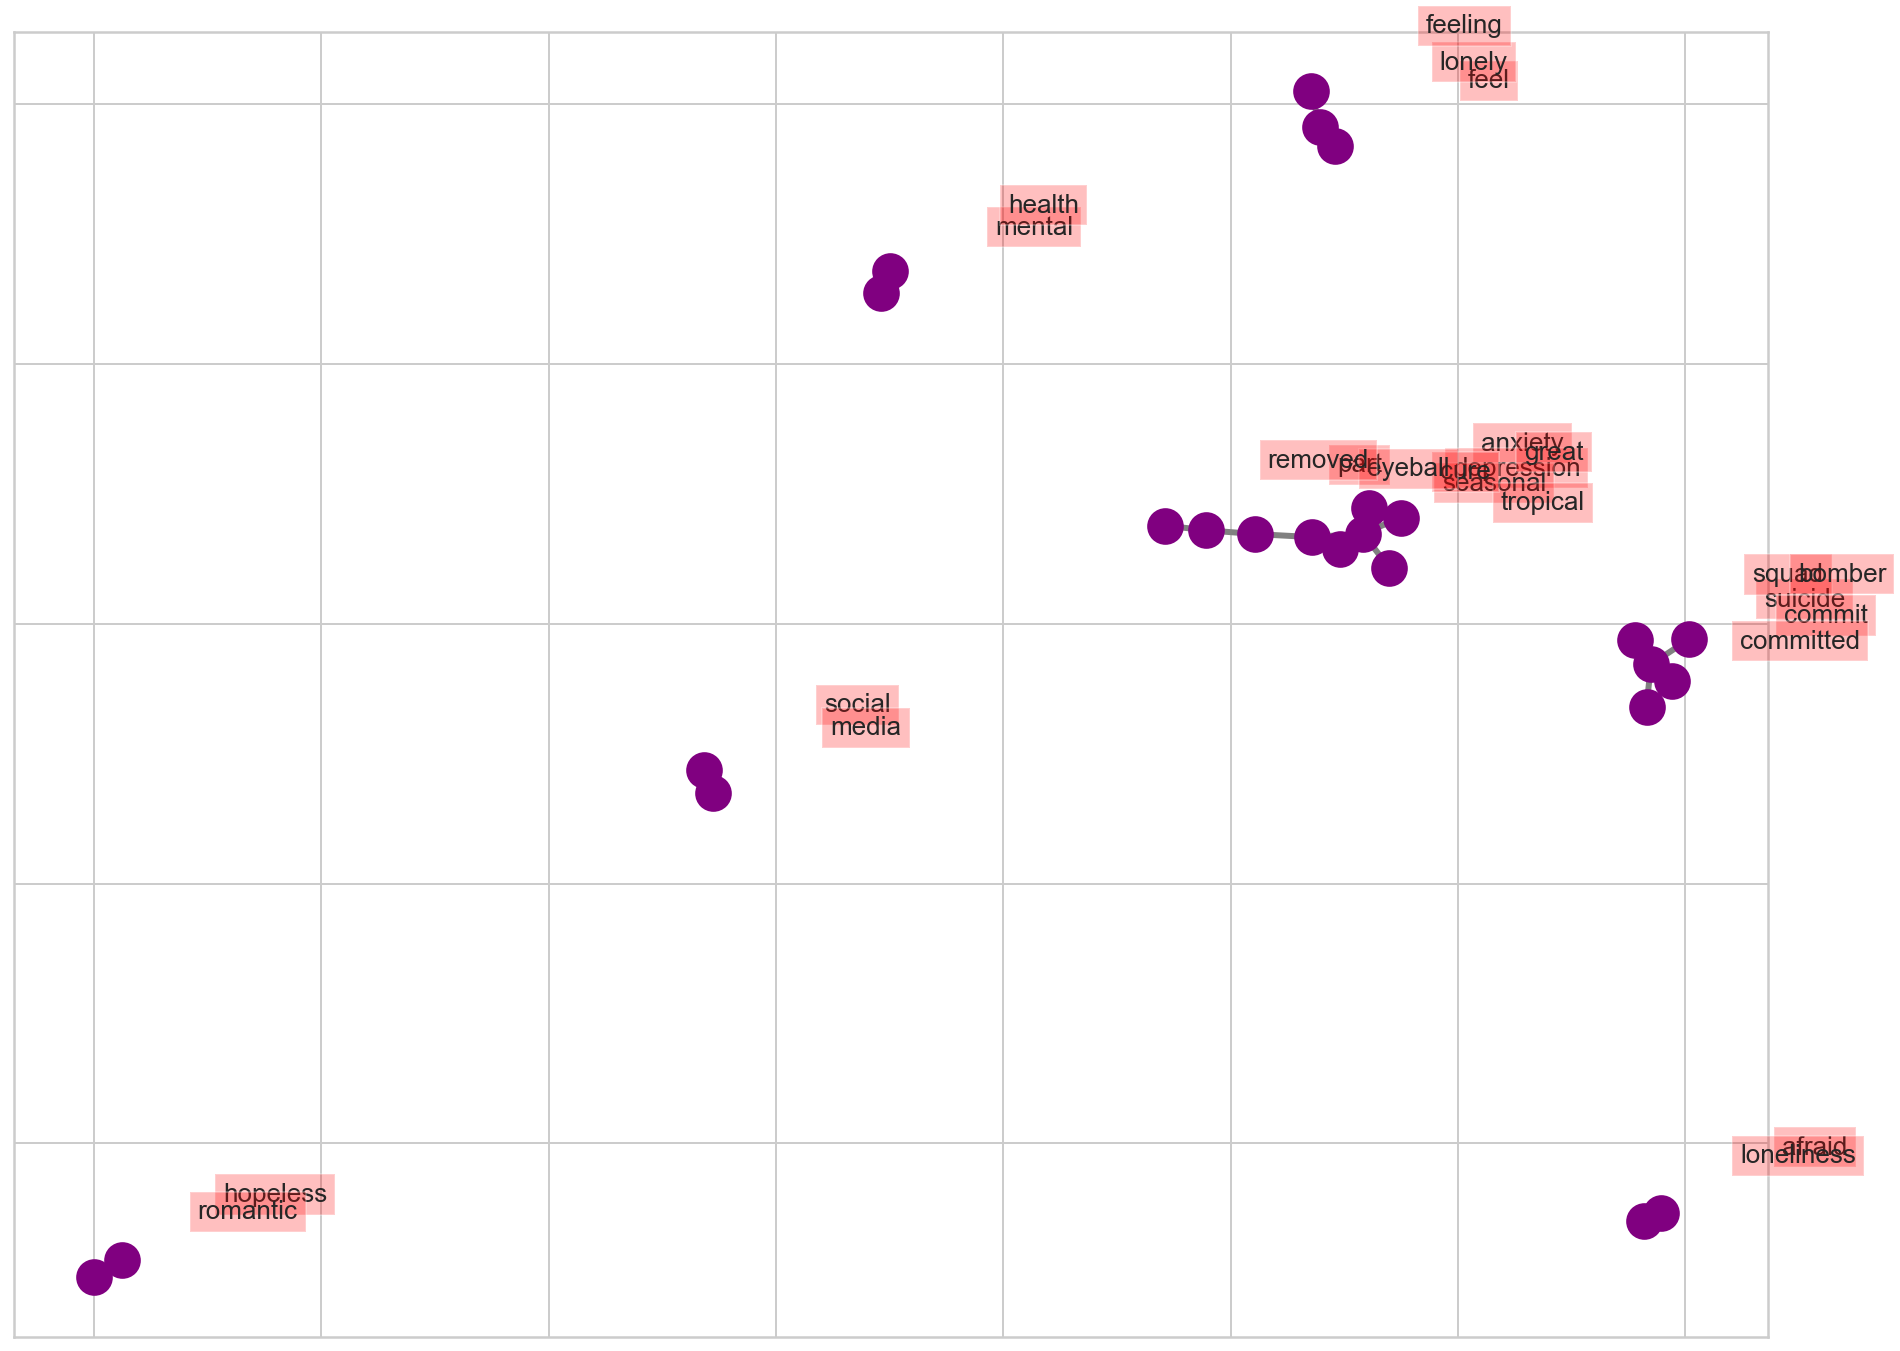

In [155]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

fig, ax = plt.subplots(figsize=(14, 12))

pos = nx.spring_layout(G, k=1)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

In [156]:
train = pd.read_csv('depressive_unigram_tweets_final.csv')

In [157]:
train.head()

,Unnamed: 0,Unnamed: 0.1,id,time,tweet,hashtags,cashtags
0,0,0,1.15135E+18,21:25:13,"Wow, my dad yday: “you don’t take those stupid...",[],[]
1,1,1,1.15135E+18,21:25:07,what part of this was really harmfult of a lot...,[],[]
2,2,2,1.15135E+18,21:25:06,one of the ways I got through my #depression i...,"['#depression', '#uncoveringthenewu', '#change...",[]
3,3,3,1.15135E+18,21:24:55,see i wanna do one of them but they all say th...,[],[]
4,4,4,1.15135E+18,21:24:51,IS IT clinical depression or is it the palpabl...,[],[]


In [158]:
train['word_count'] = train['tweet'].apply(lambda x: int(len(str(x).split(" "))))
train[['tweet','word_count']].head()

,tweet,word_count
0,"Wow, my dad yday: “you don’t take those stupid...",50
1,what part of this was really harmfult of a lot...,51
2,one of the ways I got through my #depression i...,33
3,see i wanna do one of them but they all say th...,24
4,IS IT clinical depression or is it the palpabl...,13


In [159]:
train['char_count'] = train['tweet'].str.len() ## this also includes spaces
train[['tweet','char_count']].head()

,tweet,char_count
0,"Wow, my dad yday: “you don’t take those stupid...",278.0
1,what part of this was really harmfult of a lot...,274.0
2,one of the ways I got through my #depression i...,235.0
3,see i wanna do one of them but they all say th...,114.0
4,IS IT clinical depression or is it the palpabl...,78.0


In [160]:
char_count = train['tweet'].str.len() ## this also includes spaces
char_count.head()

0    278.0
1    274.0
2    235.0
3    114.0
4     78.0
Name: tweet, dtype: float64

In [161]:
char_count.mean()

119.81889906196986

In [73]:
char_count.median()

95.0

In [74]:
char_count.mode()

0    27.0
dtype: float64

In [75]:
word_counts = train['tweet'].apply(lambda x: int(len(str(x).split(" "))))


In [76]:
word_counts.head()

0    50
1    51
2    33
3    24
4    13
Name: tweet, dtype: int64

In [77]:
word_counts.mean()

19.247525863843002

In [78]:
word_counts.median()

15.0

In [79]:
word_counts.mode()

0    1
dtype: int64

(0.0, 300.0)

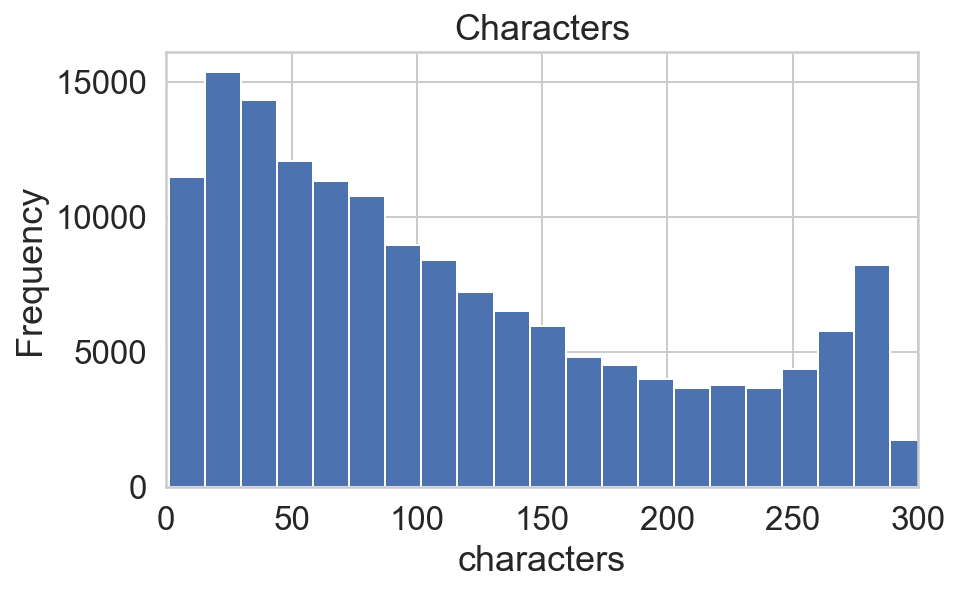

In [80]:
# Plot Histogram on x
x = char_count
plt.hist(x, bins=50)
plt.gca().set(title='Characters', ylabel='Frequency', xlabel='characters');
plt.xlim(0, 300)

(0.0, 100.0)

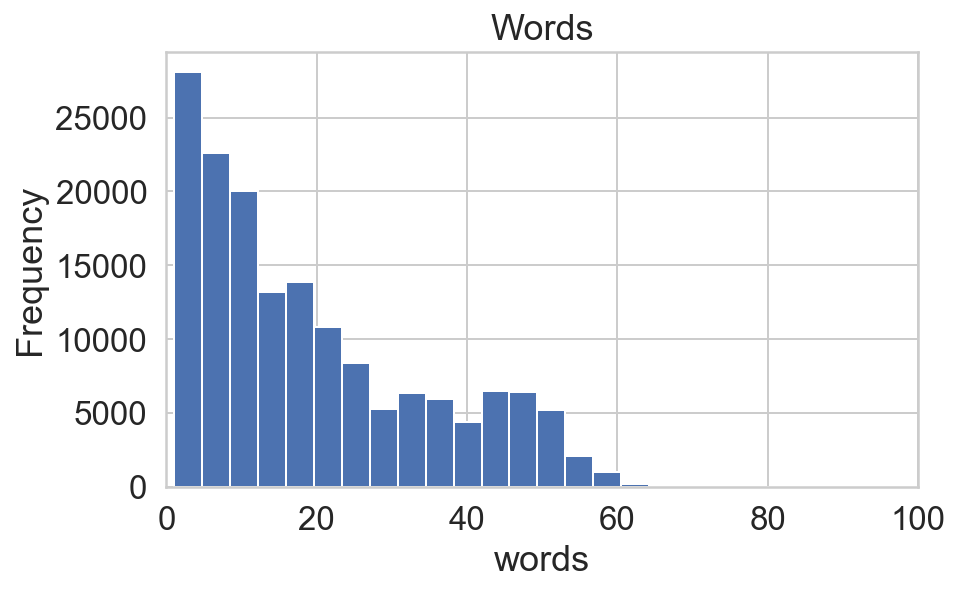

In [82]:
# Plot Histogram on x
x = word_counts
plt.hist(x, bins=50)
plt.gca().set(title='Words', ylabel='Frequency', xlabel='words');
plt.xlim(0, 100)